<a href="https://colab.research.google.com/github/YagyanshB/SemEval-Task6-CS408/blob/main/DataCove_Fletchers_Solicitors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
# DataCove 

# Fletcher's Solicitors Data Analysis Project

In [122]:
# Importing the required libraries

import numpy as np
import pandas as pd
from xgboost import plot_importance, plot_tree
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

sns.set_style('whitegrid')
plt.style.use('tableau-colorblind10')
plt.rcParams['figure.figsize'] = (20,10)

from datetime import datetime

In [128]:
# Importing the XLS file by copying the file path

xls = pd.ExcelFile('/content/Win rate predictions data template - Traditional Win Rate.xlsx')

In [143]:
# Reading a particular sheet from the above mentioned XLS file

df = pd.read_excel(xls, 'Combined_Teams_Winning Rate')

# Uploading individual dataframes for better analysis

team_1 = pd.read_excel(xls, 'Team1')
team_3 = pd.read_excel(xls, 'Team3')
team_5 = pd.read_excel(xls, 'Team5')
team_6 = pd.read_excel(xls, 'Team6')
team_7 = pd.read_excel(xls, 'Team7')
team_8 = pd.read_excel(xls, 'Team8')
team_10 = pd.read_excel(xls, 'Team10')
team_11 = pd.read_excel(xls, 'Team11')
team_12 = pd.read_excel(xls, 'Team12')
team_13 = pd.read_excel(xls, 'Team13')

In [144]:
# Inspecting the first few rows of the dataset

df.head()

,Month,Team1,Team3,Team5,Team6,Team7,Team8,Team10,Team11,Team12,Team13
0,2017-07-01,0.153846,0.000000,0.104167,0.000000,0.096774,0.000000,0.166667,0.120000,0.050000,0.0
1,2017-08-01,0.137931,0.090909,0.155844,0.000000,0.153846,0.000000,0.250000,0.189189,0.051724,0.0
2,2017-09-01,0.210526,0.150943,0.163043,0.035714,0.159091,0.000000,0.212121,0.234043,0.076923,0.0
3,2017-10-01,0.153846,0.181818,0.146154,0.071429,0.178571,0.068966,0.203704,0.205882,0.071429,0.0
4,2017-11-01,0.175258,0.182796,0.131737,0.062500,0.171875,0.085106,0.194805,0.207317,0.070796,0.0


In [145]:
# Inspecting the last few rows of the dataset

df.tail()

,Month,Team1,Team3,Team5,Team6,Team7,Team8,Team10,Team11,Team12,Team13
47,2021-06-01,0.212205,0.235862,0.207865,0.204082,0.209040,0.208955,0.218153,0.210136,0.181957,0.138462
48,2021-07-01,0.211669,0.233784,0.211283,0.199005,0.206944,0.211842,0.218750,0.212817,0.178042,0.142857
49,2021-08-01,0.208777,0.233645,0.213508,0.204839,0.208447,0.214653,0.217458,0.211905,0.177068,0.141439
50,2021-09-01,0.208062,0.233202,0.216561,0.208791,0.203457,0.214467,0.217066,0.211449,0.176136,0.144254
51,2021-10-01,0.208071,0.233766,0.219665,0.208909,0.202335,0.213135,0.215859,0.211316,0.177778,0.146283


In [146]:
# Inspecting the number of rows & columns in the dataset

# Our dataset has 52 rows & 11 columns

df.shape

(52, 11)

In [133]:
# Checking if our dataset has null values 

df.isnull().sum()

# We have zero null values

Month     0
Team1     0
Team3     0
Team5     0
Team6     0
Team7     0
Team8     0
Team10    0
Team11    0
Team12    0
Team13    0
dtype: int64

In [147]:
# Collating descriptive statistics from our DataFrame

df.describe()

,Team1,Team3,Team5,Team6,Team7,Team8,Team10,Team11,Team12,Team13
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.208508,0.217895,0.183561,0.149429,0.200570,0.160078,0.215794,0.212650,0.148101,0.053803
std,0.020518,0.040401,0.029215,0.058247,0.023375,0.055605,0.013971,0.020754,0.042736,0.058050
min,0.137931,0.000000,0.104167,0.000000,0.096774,0.000000,0.166667,0.120000,0.050000,0.000000
25%,0.202123,0.217302,0.160580,0.108881,0.190796,0.130594,0.206101,0.208909,0.127319,0.000000
50%,0.214281,0.224446,0.202471,0.172526,0.205438,0.177267,0.217947,0.212101,0.172105,0.015668
75%,0.223587,0.233771,0.206714,0.198735,0.219156,0.201098,0.225914,0.224248,0.181963,0.113733
max,0.227586,0.275000,0.219665,0.208909,0.227053,0.214653,0.250000,0.249169,0.198646,0.146283


In [148]:
# Inspecting the first few rows of Team1

team_1.head(5)

,Month,Winning Rate
0,2017-07-01,0.153846
1,2017-08-01,0.137931
2,2017-09-01,0.210526
3,2017-10-01,0.153846
4,2017-11-01,0.175258


In [149]:
# Again inspecting the last few rows of Team1

team_1.dtypes

Month           datetime64[ns]
Winning Rate           float64
dtype: object

In [150]:
# Indexing our dataframe for better clarity in data analysis

team_1['Month'] = pd.to_datetime(team_1['Month'], infer_datetime_format= True)
indexed_team_1 = team_1.set_index(['Month'])

team_3['Month'] = pd.to_datetime(team_3['Month'], infer_datetime_format= True)
indexed_team_3 = team_3.set_index(['Month'])

team_5['Month'] = pd.to_datetime(team_5['Month'], infer_datetime_format= True)
indexed_team_5 = team_5.set_index(['Month'])

team_6['Month'] = pd.to_datetime(team_6['Month'], infer_datetime_format= True)
indexed_team_6 = team_6.set_index(['Month'])

team_7['Month'] = pd.to_datetime(team_7['Month'], infer_datetime_format= True)
indexed_team_7 = team_7.set_index(['Month'])

team_8['Month'] = pd.to_datetime(team_8['Month'], infer_datetime_format= True)
indexed_team_8 = team_8.set_index(['Month'])

team_10['Month'] = pd.to_datetime(team_10['Month'], infer_datetime_format= True)
indexed_team_10 = team_10.set_index(['Month'])

team_11['Month'] = pd.to_datetime(team_11['Month'], infer_datetime_format= True)
indexed_team_11 = team_11.set_index(['Month'])

team_12['Month'] = pd.to_datetime(team_12['Month'], infer_datetime_format= True)
indexed_team_12 = team_12.set_index(['Month'])

team_13['Month'] = pd.to_datetime(team_13['Month'], infer_datetime_format= True)
indexed_team_13 = team_13.set_index(['Month'])

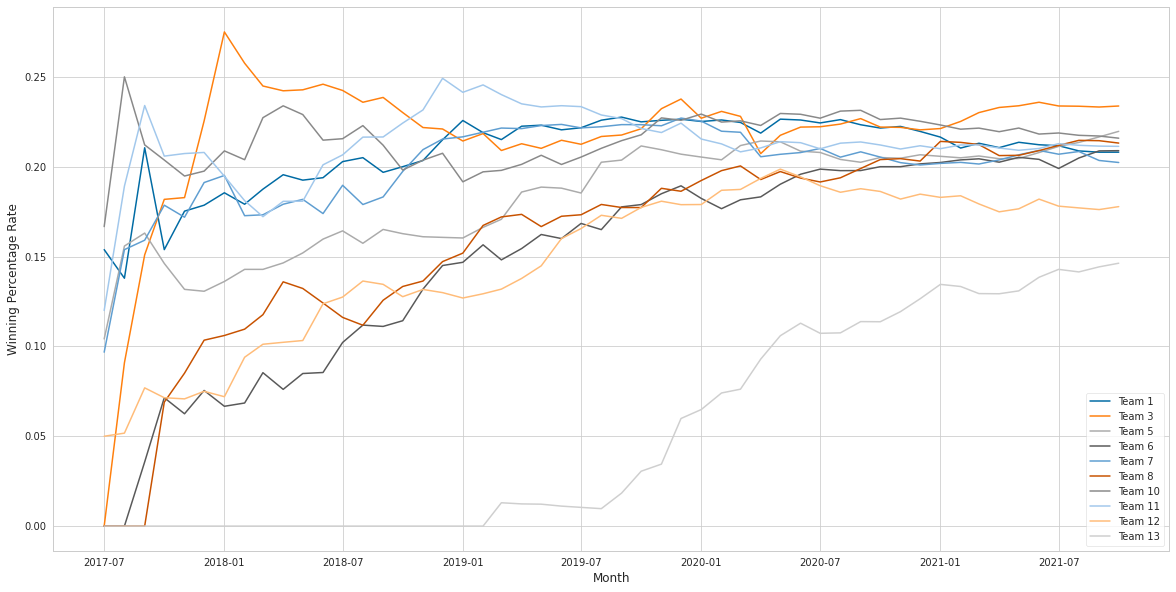

In [151]:
plt.xlabel('Month')
plt.ylabel('Winning Percentage Rate')
plt.plot(indexed_team_1, label = 'Team 1')
plt.plot(indexed_team_3, label = 'Team 3')
plt.plot(indexed_team_5, label = 'Team 5')
plt.plot(indexed_team_6, label = 'Team 6')
plt.plot(indexed_team_7, label = 'Team 7')
plt.plot(indexed_team_8, label = 'Team 8')
plt.plot(indexed_team_10, label = 'Team 10')
plt.plot(indexed_team_11, label = 'Team 11')
plt.plot(indexed_team_12, label = 'Team 12')
plt.plot(indexed_team_13, label = 'Team 13')
plt.legend()
plt.show()

In [153]:
# Determining the Rolling Statistics for different teams

# Rolling Mean for all the teams

rolmean_1 = indexed_team_1.rolling(window = 12).mean()
rolmean_3 = indexed_team_3.rolling(window = 12).mean()
rolmean_5 = indexed_team_5.rolling(window = 12).mean()
rolmean_6 = indexed_team_6.rolling(window = 12).mean()
rolmean_7 = indexed_team_7.rolling(window = 12).mean()
rolmean_8 = indexed_team_8.rolling(window = 12).mean()
rolmean_10 = indexed_team_10.rolling(window = 12).mean()
rolmean_11 = indexed_team_11.rolling(window = 12).mean()
rolmean_12 = indexed_team_12.rolling(window = 12).mean()
rolmean_13 = indexed_team_13.rolling(window = 12).mean()

# Rolling Standard Deviations for all the teams 

rolstd_1 = indexed_team_1.rolling(window = 12).std()
rolstd_3 = indexed_team_3.rolling(window = 12).std()
rolstd_5 = indexed_team_5.rolling(window = 12).std()
rolstd_6 = indexed_team_6.rolling(window = 12).std()
rolstd_7 = indexed_team_7.rolling(window = 12).std()
rolstd_8 = indexed_team_8.rolling(window = 12).std()
rolstd_10 = indexed_team_10.rolling(window = 12).std()
rolstd_11 = indexed_team_11.rolling(window = 12).std()
rolstd_12 = indexed_team_12.rolling(window = 12).std()
rolstd_13 = indexed_team_13.rolling(window = 12).std()

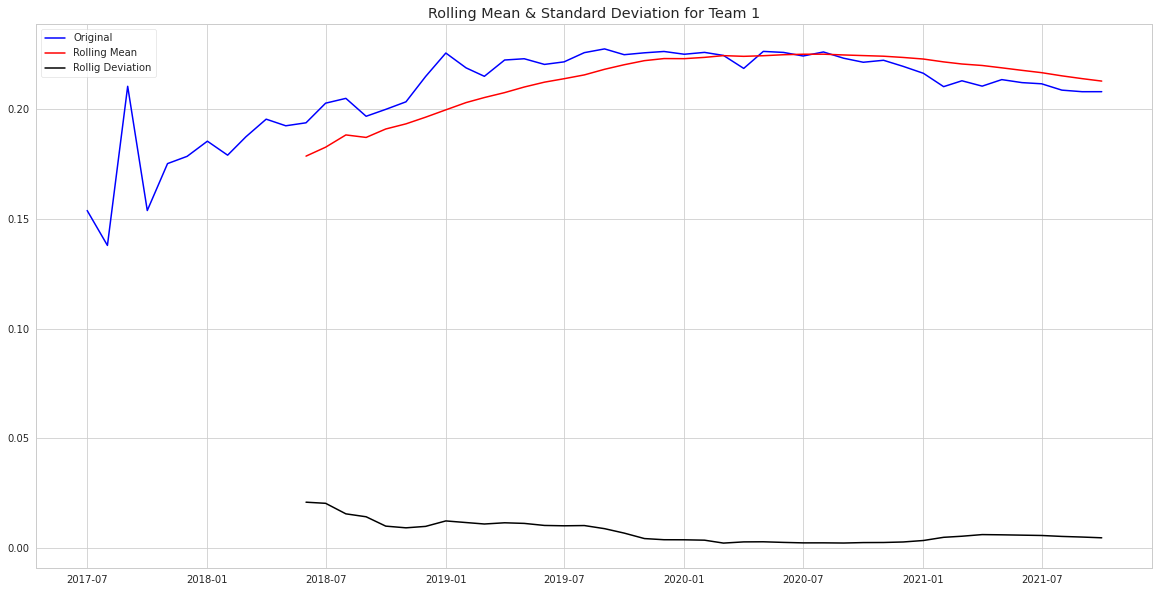

In [154]:
# Plotting the rolling statistics 

orig = plt.plot(indexed_team_1, color = 'blue', label = 'Original')
mean = plt.plot(rolmean_1, color = 'red', label = 'Rolling Mean' )
std = plt.plot(rolstd_1, color = 'black', label = 'Rollig Deviation')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation for Team 1')
plt.show(block = False)

# Observation - There is a fair amount of consistency with the winning rates in Team 1

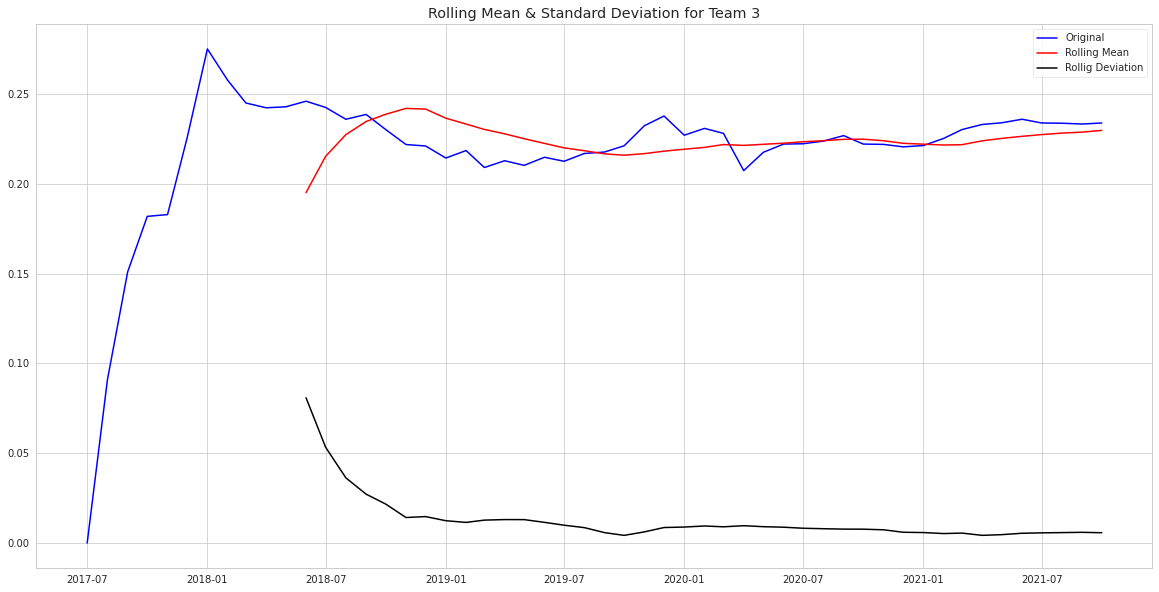

In [156]:
# Plotting the rolling statistics 

orig = plt.plot(indexed_team_3, color = 'blue', label = 'Original')
mean = plt.plot(rolmean_3, color = 'red', label = 'Rolling Mean' )
std = plt.plot(rolstd_3, color = 'black', label = 'Rollig Deviation')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation for Team 3')
plt.show(block = False)

# Observation - There is a fair amount of highs & lows with the winning rates in Team 3
# specifically in the first half of 2018

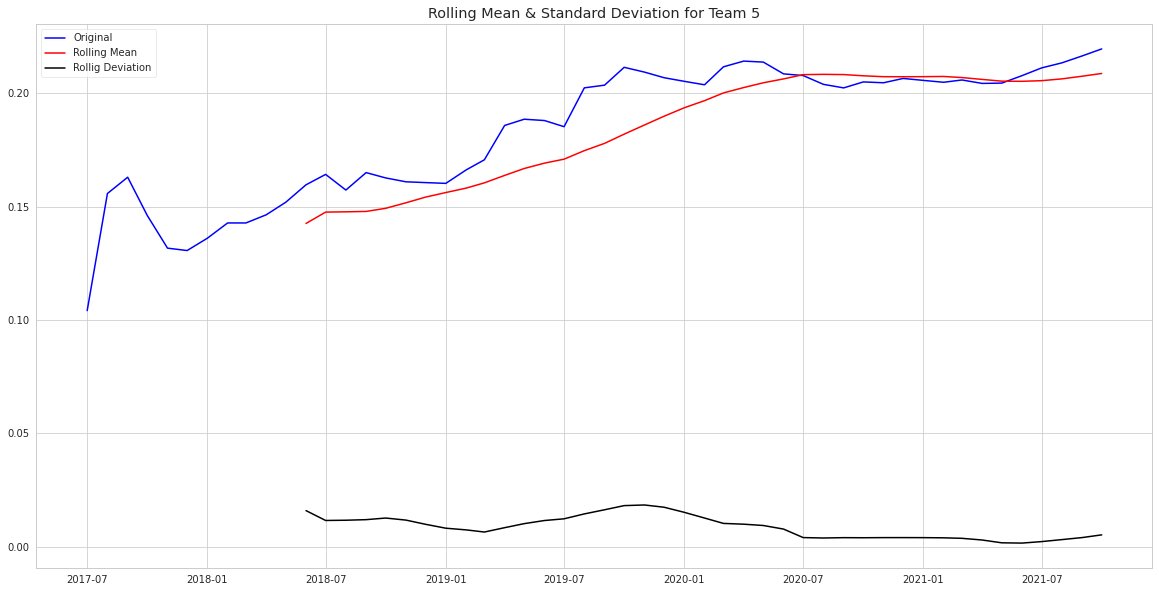

In [157]:
# Plotting the rolling statistics 

orig = plt.plot(indexed_team_5, color = 'blue', label = 'Original')
mean = plt.plot(rolmean_5, color = 'red', label = 'Rolling Mean' )
std = plt.plot(rolstd_5, color = 'black', label = 'Rollig Deviation')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation for Team 5')
plt.show(block = False)

# Observation - There is a fair amount of consistency with the winning rates in Team 5

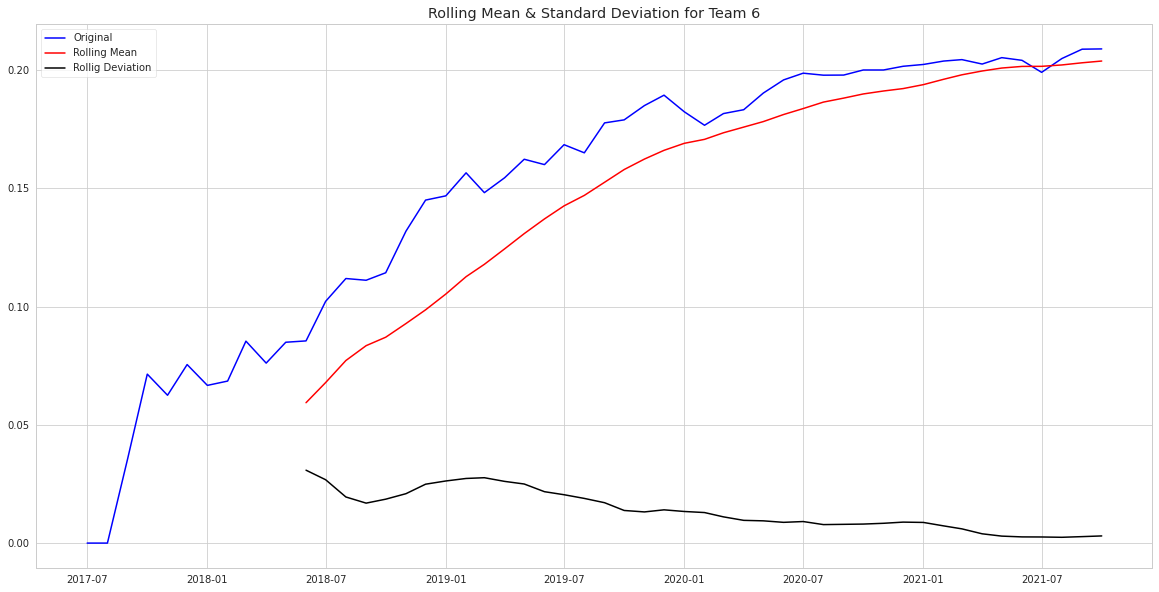

In [158]:
# Plotting the rolling statistics 

orig = plt.plot(indexed_team_6, color = 'blue', label = 'Original')
mean = plt.plot(rolmean_6, color = 'red', label = 'Rolling Mean' )
std = plt.plot(rolstd_6, color = 'black', label = 'Rollig Deviation')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation for Team 6')
plt.show(block = False)

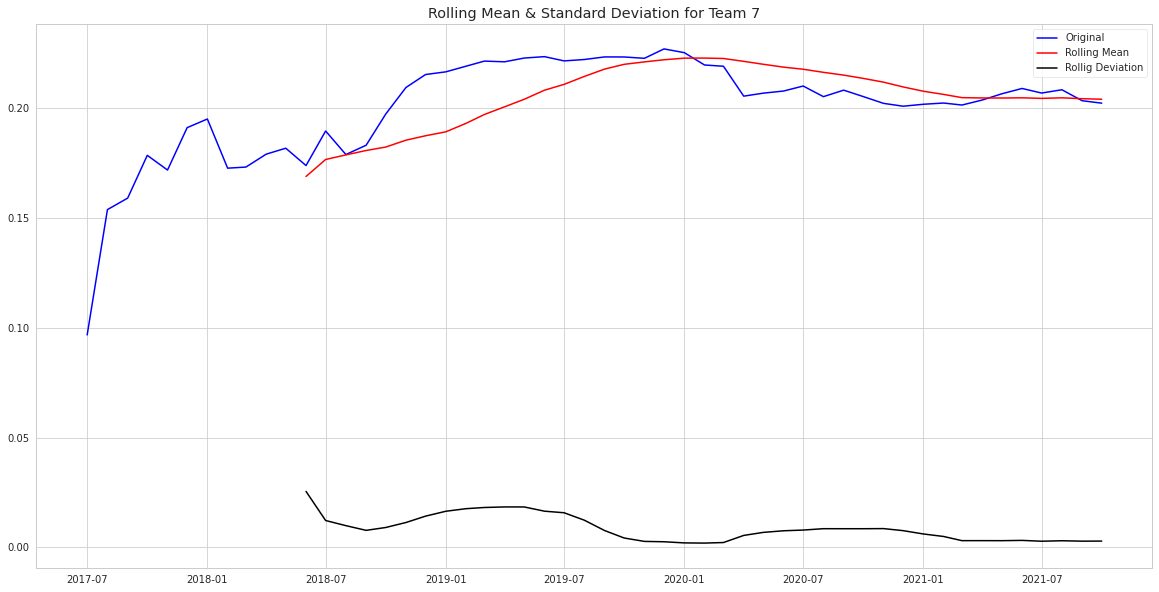

In [159]:
# Plotting the rolling statistics 

orig = plt.plot(indexed_team_7, color = 'blue', label = 'Original')
mean = plt.plot(rolmean_7, color = 'red', label = 'Rolling Mean' )
std = plt.plot(rolstd_7, color = 'black', label = 'Rollig Deviation')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation for Team 7')
plt.show(block = False)

# Observation - There is a fair amount of consistency with the winning rates in Team 7

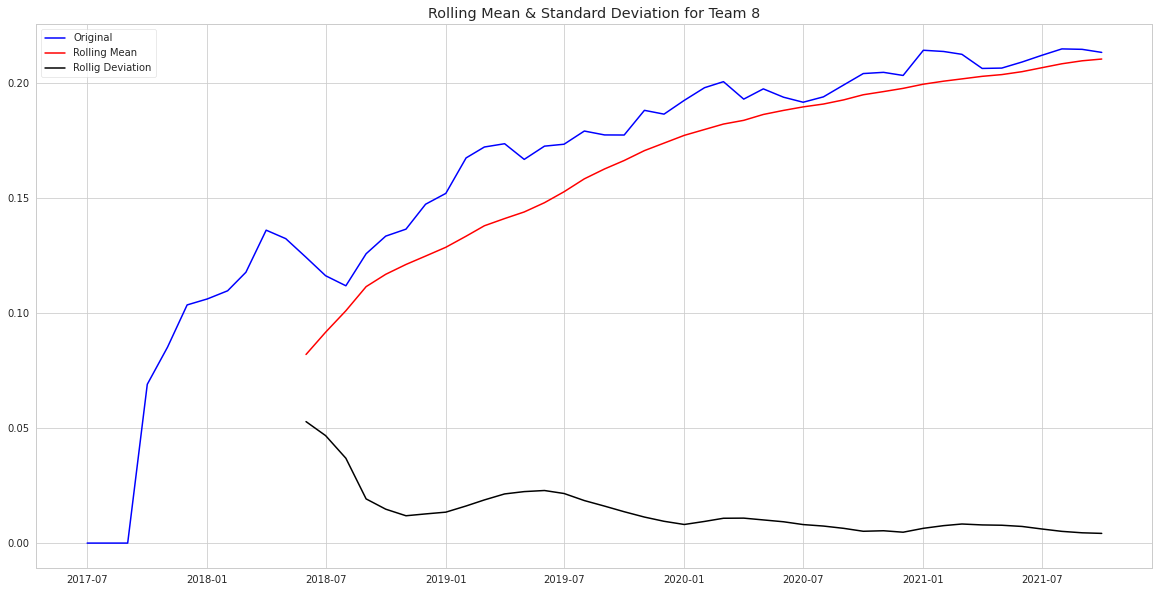

In [161]:
# Plotting the rolling statistics 

orig = plt.plot(indexed_team_8, color = 'blue', label = 'Original')
mean = plt.plot(rolmean_8, color = 'red', label = 'Rolling Mean' )
std = plt.plot(rolstd_8, color = 'black', label = 'Rollig Deviation')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation for Team 8')
plt.show(block = False)

# Observation - There is a fair amount of inconsistency with the winning rates in Team 8
# although they do end up having a higher winning rate towards the end of every financial year

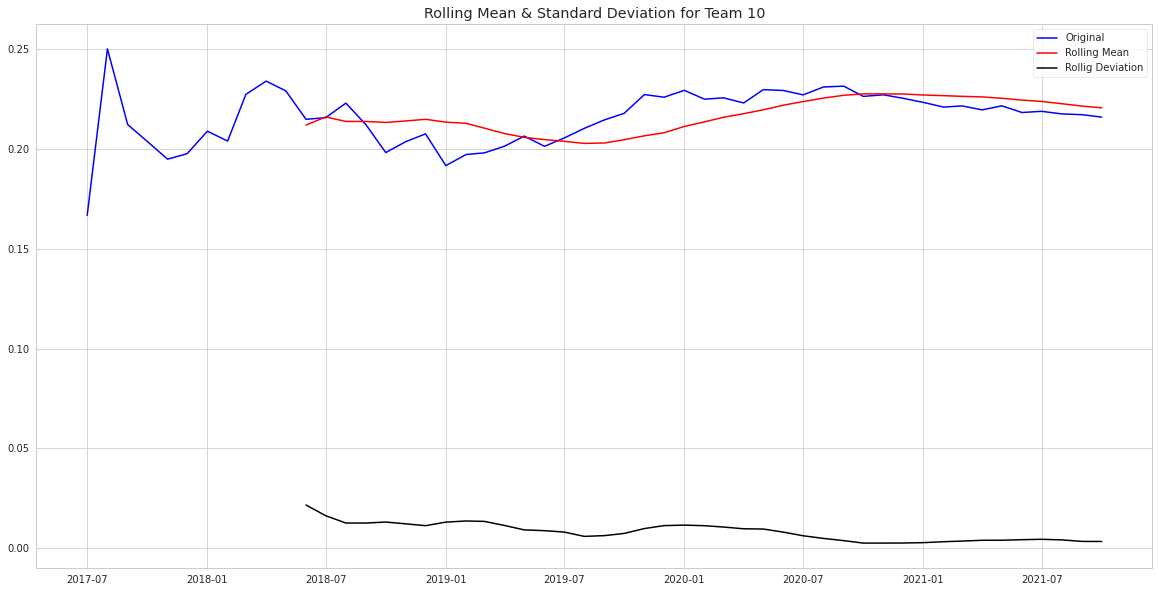

In [162]:
# Plotting the rolling statistics 

orig = plt.plot(indexed_team_10, color = 'blue', label = 'Original')
mean = plt.plot(rolmean_10, color = 'red', label = 'Rolling Mean' )
std = plt.plot(rolstd_10, color = 'black', label = 'Rollig Deviation')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation for Team 10')
plt.show(block = False)

# Observation - There is a fair amount of inconsistency with the winning rates in Team 10

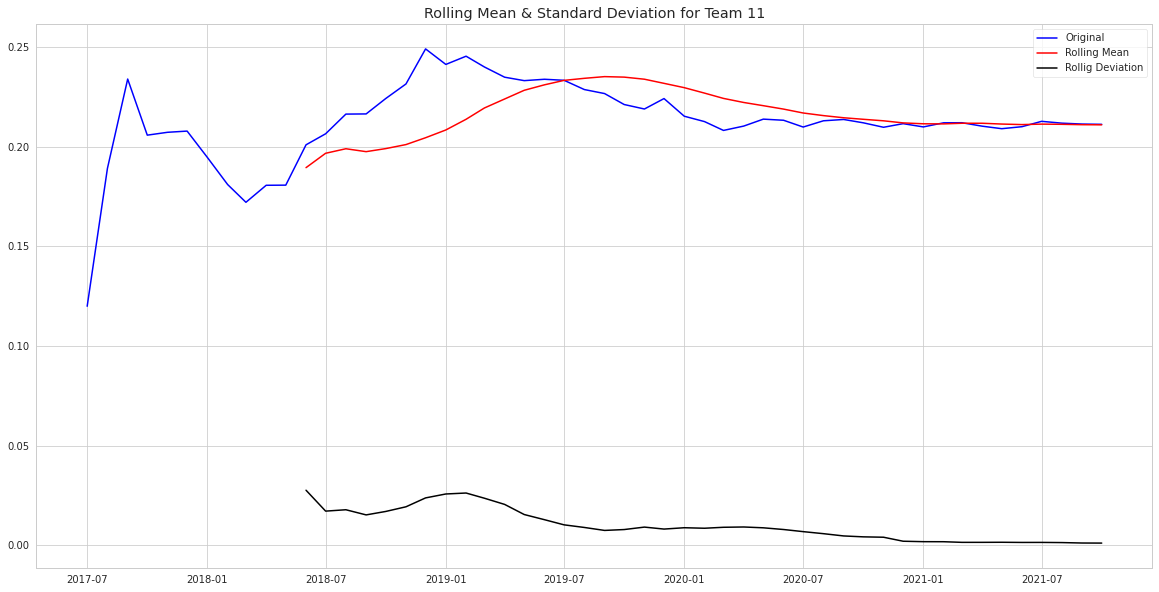

In [163]:
# Plotting the rolling statistics 

orig = plt.plot(indexed_team_11, color = 'blue', label = 'Original')
mean = plt.plot(rolmean_11, color = 'red', label = 'Rolling Mean' )
std = plt.plot(rolstd_11, color = 'black', label = 'Rollig Deviation')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation for Team 11')
plt.show(block = False)

# Observation - There is a fair amount of consistency with the winning rates in Team 11
# although the winning rates have been declinining for the past two years

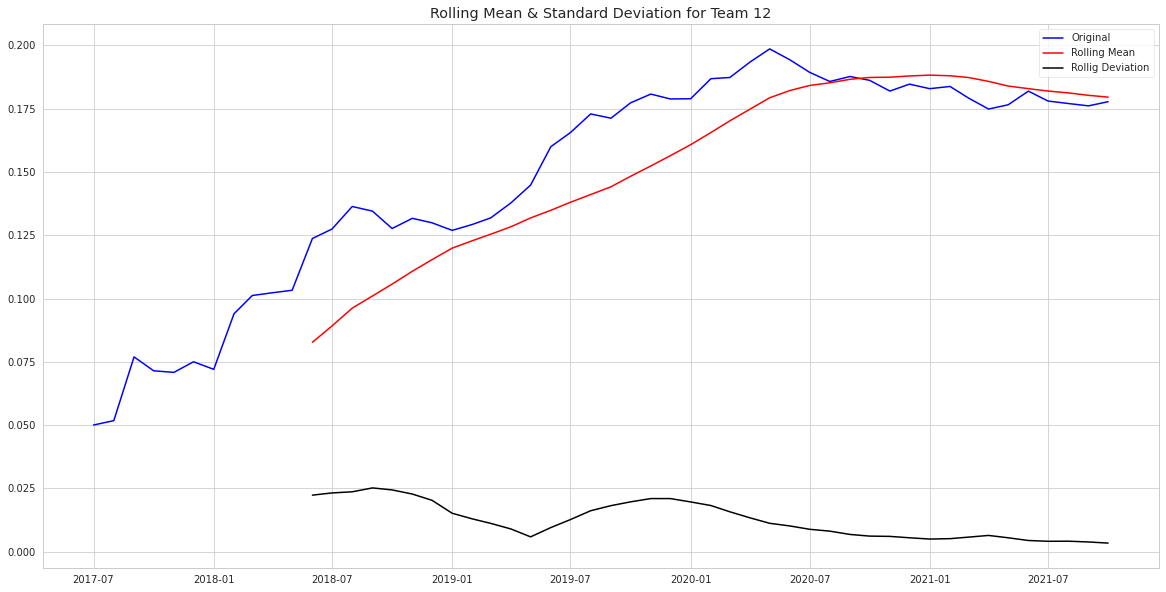

In [164]:
# Plotting the rolling statistics 

orig = plt.plot(indexed_team_12, color = 'blue', label = 'Original')
mean = plt.plot(rolmean_12, color = 'red', label = 'Rolling Mean' )
std = plt.plot(rolstd_12, color = 'black', label = 'Rollig Deviation')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation for Team 12')
plt.show(block = False)

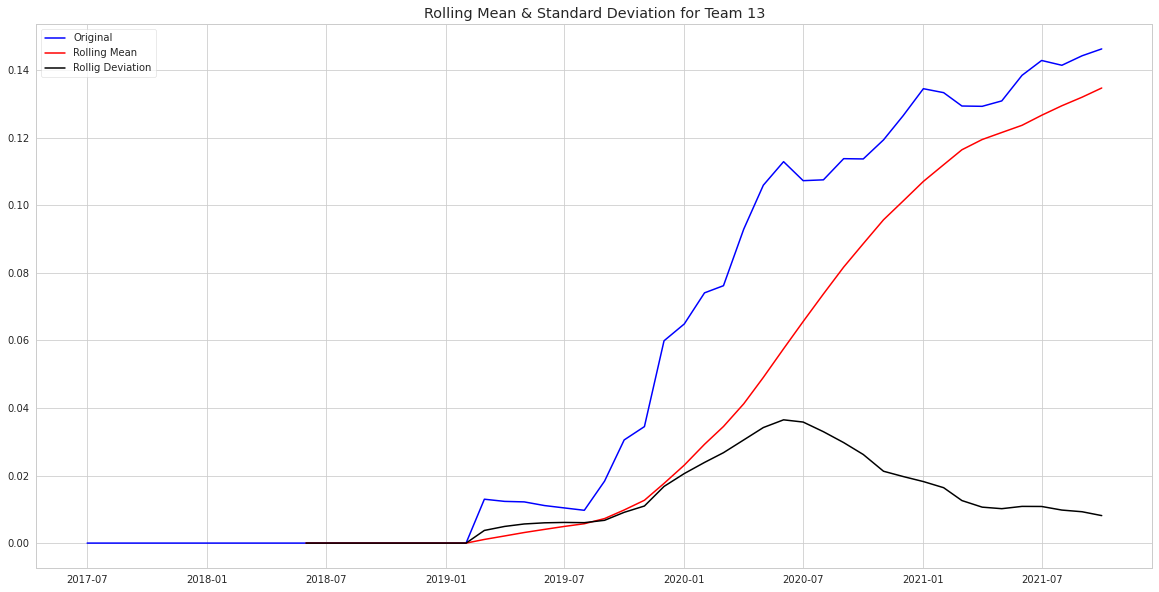

In [165]:
# Plotting the rolling statistics 

orig = plt.plot(indexed_team_13, color = 'blue', label = 'Original')
mean = plt.plot(rolmean_13, color = 'red', label = 'Rolling Mean' )
std = plt.plot(rolstd_13, color = 'black', label = 'Rollig Deviation')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation for Team 13')
plt.show(block = False)

# Observation - There is a major amount of change with the winning rates in Team 13 
# with a sudden upwards trend noticed.

In [166]:
# Performing Dicky Fuller Test For Team 1

from statsmodels.tsa.stattools import adfuller

print("Results of Dicky Fuller Test: ")
dftest = adfuller(indexed_team_1['Winning Rate'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

# The data is stationary owing to the low P Value implying that the winning rates are consistent.
# Reasoning: p-value < 0.05


Results of Dicky Fuller Test: 
Test Statistic                 -3.498957
p-value                         0.008014
#Lags Used                      0.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


In [167]:
# Performing Dicky Fuller Test For Team 3

from statsmodels.tsa.stattools import adfuller

print("Results of Dicky Fuller Test: ")
dftest = adfuller(indexed_team_3['Winning Rate'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

# The data is stationary owing to the low P Value implying that the winning rates are consistent.
# Reasoning: p-value < 0.05


Results of Dicky Fuller Test: 
Test Statistic                -1.164907e+01
p-value                        2.058203e-21
#Lags Used                     0.000000e+00
Number of Observations Used    5.100000e+01
Critical Value (1%)           -3.565624e+00
Critical Value (5%)           -2.920142e+00
Critical Value (10%)          -2.598015e+00
dtype: float64


In [169]:
# Performing Dicky Fuller Test For Team 5

from statsmodels.tsa.stattools import adfuller

print("Results of Dicky Fuller Test: ")
dftest = adfuller(indexed_team_5['Winning Rate'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

# The data is not stationary owing to the high P Value implying that the winning rates are consistent.
# Reasoning: p-value > 0.05

Results of Dicky Fuller Test: 
Test Statistic                 -2.611591
p-value                         0.090625
#Lags Used                      0.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


In [171]:
# Performing Dicky Fuller Test For Team 6

from statsmodels.tsa.stattools import adfuller

print("Results of Dicky Fuller Test: ")
dftest = adfuller(indexed_team_6['Winning Rate'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

# The data is stationary owing to the low P Value implying that the winning rates are consistent.
# However the p-value is very close to 0.05 & Team 6 should be closely monitored
# Reasoning: p-value < 0.05

Results of Dicky Fuller Test: 
Test Statistic                 -3.363431
p-value                         0.012271
#Lags Used                      4.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [172]:
# Performing Dicky Fuller Test For Team 7

from statsmodels.tsa.stattools import adfuller

print("Results of Dicky Fuller Test: ")
dftest = adfuller(indexed_team_7['Winning Rate'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

Results of Dicky Fuller Test: 
Test Statistic                 -3.323449
p-value                         0.013862
#Lags Used                      8.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


In [173]:
# Performing Dicky Fuller Test For Team 8

from statsmodels.tsa.stattools import adfuller

print("Results of Dicky Fuller Test: ")
dftest = adfuller(indexed_team_8['Winning Rate'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

# The data is stationary owing to the low P Value implying that the winning rates are consistent.
# Reasoning: p-value < 0.05

Results of Dicky Fuller Test: 
Test Statistic                 -5.243751
p-value                         0.000007
#Lags Used                     10.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [174]:
# Performing Dicky Fuller Test For Team 10

from statsmodels.tsa.stattools import adfuller

print("Results of Dicky Fuller Test: ")
dftest = adfuller(indexed_team_10['Winning Rate'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

# The data is not stationary owing to the P Value being greater than 0.05 implying that the winning rates are 
# not consistent.
# Reasoning: p-value > 0.05

Results of Dicky Fuller Test: 
Test Statistic                 -2.728040
p-value                         0.069310
#Lags Used                      5.000000
Number of Observations Used    46.000000
Critical Value (1%)            -3.581258
Critical Value (5%)            -2.926785
Critical Value (10%)           -2.601541
dtype: float64


In [176]:
# Performing Dicky Fuller Test For Team 11

from statsmodels.tsa.stattools import adfuller

print("Results of Dicky Fuller Test: ")
dftest = adfuller(indexed_team_11['Winning Rate'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

# The data is stationary owing to the low P Value implying that the winning rates are consistent.
# However the p-value is very close to 0.05 & Team 11 should be closely monitored
# Reasoning: p-value < 0.05

Results of Dicky Fuller Test: 
Test Statistic                 -2.880957
p-value                         0.047608
#Lags Used                      6.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


In [178]:
# Performing Dicky Fuller Test For Team 12

from statsmodels.tsa.stattools import adfuller

print("Results of Dicky Fuller Test: ")
dftest = adfuller(indexed_team_12['Winning Rate'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

# The data is stationary owing to the low P Value implying that the winning rates are consistent.
# Reasoning: p-value < 0.05

Results of Dicky Fuller Test: 
Test Statistic                 -3.145017
p-value                         0.023396
#Lags Used                      1.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


In [180]:
# Performing Dicky Fuller Test For Team 13

from statsmodels.tsa.stattools import adfuller

print("Results of Dicky Fuller Test: ")
dftest = adfuller(indexed_team_13['Winning Rate'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value

print(dfoutput)

# The data is not stationary owing to the P Value being greater than 0.05 implying that the winning rates are 
# not consistent.
# Reasoning: p-value > 0.05

Results of Dicky Fuller Test: 
Test Statistic                  0.407735
p-value                         0.981782
#Lags Used                      1.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


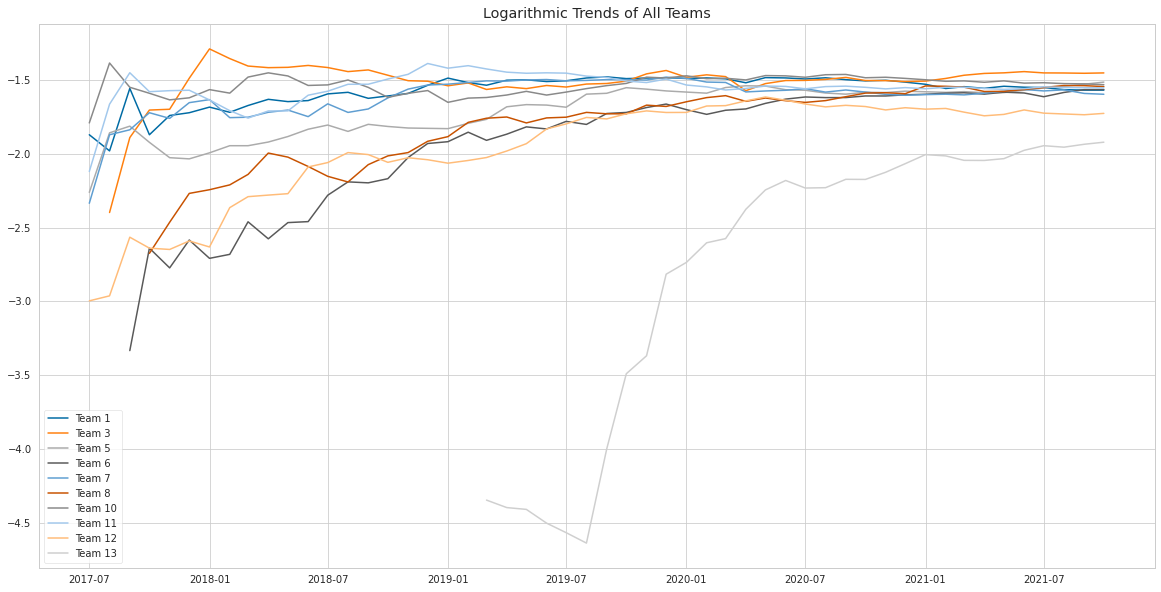

In [183]:
# Estimating the Trend

indexed_team_1_logscale = np.log(indexed_team_1)
plt.plot(indexed_team_1_logscale, label = 'Team 1')

indexed_team_3_logscale = np.log(indexed_team_3)
plt.plot(indexed_team_3_logscale, label = 'Team 3')

indexed_team_5_logscale = np.log(indexed_team_5)
plt.plot(indexed_team_5_logscale, label = 'Team 5')

indexed_team_6_logscale = np.log(indexed_team_6)
plt.plot(indexed_team_6_logscale, label = 'Team 6')

indexed_team_7_logscale = np.log(indexed_team_7)
plt.plot(indexed_team_7_logscale, label = 'Team 7')

indexed_team_8_logscale = np.log(indexed_team_8)
plt.plot(indexed_team_8_logscale, label = 'Team 8')

indexed_team_10_logscale = np.log(indexed_team_10)
plt.plot(indexed_team_10_logscale, label = 'Team 10')

indexed_team_11_logscale = np.log(indexed_team_11)
plt.plot(indexed_team_11_logscale, label = 'Team 11')

indexed_team_12_logscale = np.log(indexed_team_12)
plt.plot(indexed_team_12_logscale, label = 'Team 12')

indexed_team_13_logscale = np.log(indexed_team_13)
plt.plot(indexed_team_13_logscale, label = 'Team 13')

plt.title('Logarithmic Trends of All Teams')
plt.legend(loc = 'lower left')
plt.show()


In [30]:
team_1 = team_1.dropna()

,Month,Winning Rate,Win_Rate_Last_Month,Win_Rate_2_Months_Back,Win_Rate_3_Months_Back
3,2017-10-01,0.153846,0.210526,0.137931,0.153846
4,2017-11-01,0.175258,0.153846,0.210526,0.137931
5,2017-12-01,0.178571,0.175258,0.153846,0.210526
6,2018-01-01,0.185484,0.178571,0.175258,0.153846
7,2018-02-01,0.179104,0.185484,0.178571,0.175258


In [31]:
team1 = team_1.set_index(['Month'])

In [32]:
team1.head(5)

,Winning Rate,Win_Rate_Last_Month,Win_Rate_2_Months_Back,Win_Rate_3_Months_Back
Month,,,,
2017-10-01,0.153846,0.210526,0.137931,0.153846
2017-11-01,0.175258,0.153846,0.210526,0.137931
2017-12-01,0.178571,0.175258,0.153846,0.210526
2018-01-01,0.185484,0.178571,0.175258,0.153846
2018-02-01,0.179104,0.185484,0.178571,0.175258


In [33]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, max_features = 3, random_state = 1)

In [36]:
import numpy as np

x1,x2,x3, y = team1['Win_Rate_Last_Month'], team1['Win_Rate_2_Months_Back'], team1['Win_Rate_3_Months_Back'], team1['Winning Rate']
x1,x2,x3, y = np.array(x1), np.array(x2), np.array(x3), np.array(y)

x1,x2,x3, y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3), axis = 1)
print(final_x)

[[0.21052632 0.13793103 0.15384615]
 [0.15384615 0.21052632 0.13793103]
 [0.17525773 0.15384615 0.21052632]
 [0.17857143 0.17525773 0.15384615]
 [0.18548387 0.17857143 0.17525773]
 [0.17910448 0.18548387 0.17857143]
 [0.1875     0.17910448 0.18548387]
 [0.19553073 0.1875     0.17910448]
 [0.19251337 0.19553073 0.1875    ]
 [0.19387755 0.19251337 0.19553073]
 [0.20283019 0.19387755 0.19251337]
 [0.20502092 0.20283019 0.19387755]
 [0.19685039 0.20502092 0.20283019]
 [0.2        0.19685039 0.20502092]
 [0.20344828 0.2        0.19685039]
 [0.21498371 0.20344828 0.2       ]
 [0.22570533 0.21498371 0.20344828]
 [0.21893491 0.22570533 0.21498371]
 [0.2150838  0.21893491 0.22570533]
 [0.22252011 0.2150838  0.21893491]
 [0.22309711 0.22252011 0.2150838 ]
 [0.22051282 0.22309711 0.22252011]
 [0.22167488 0.22051282 0.22309711]
 [0.22588235 0.22167488 0.22051282]
 [0.22758621 0.22588235 0.22167488]
 [0.22494432 0.22758621 0.22588235]
 [0.22580645 0.22494432 0.22758621]
 [0.22641509 0.22580645 0.22

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = final_x[:-30], final_x[-30:], y[:-30], y[-30:] 

In [39]:
model.fit(X_train, y_train)
lin_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


LinearRegression()

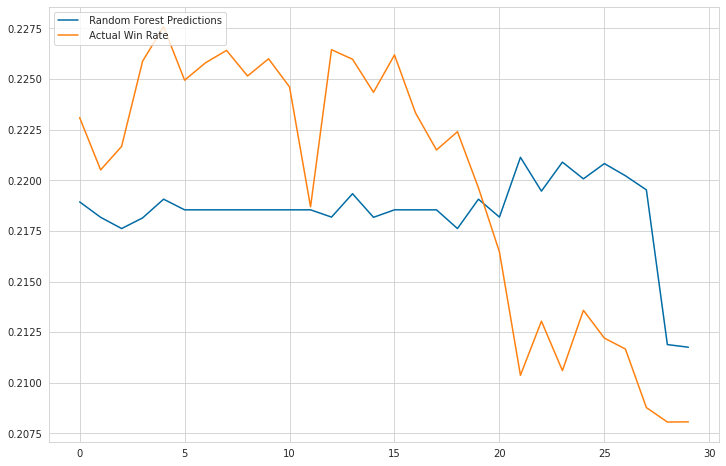

In [40]:
pred = model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred, label = ' Random Forest Predictions')
plt.plot(y_test, label = ' Actual Win Rate')
plt.legend(loc = 'upper left')
plt.show()

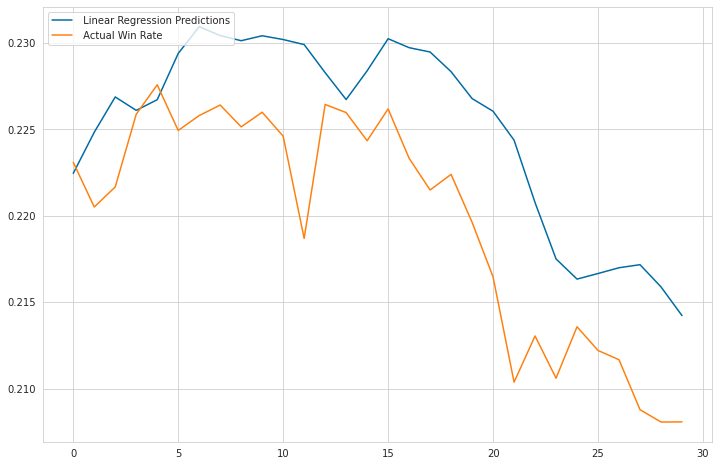

In [47]:
pred = lin_model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred, label = ' Linear Regression Predictions')
plt.plot(y_test, label = ' Actual Win Rate')
plt.legend(loc = 'upper left')
plt.show()

In [69]:
indexed_team_1.head(5)

,Winning Rate
Month,
2017-07-01,0.153846
2017-08-01,0.137931
2017-09-01,0.210526
2017-10-01,0.153846
2017-11-01,0.175258


In [70]:
indexed_team_1.head(5)

,Winning Rate
Month,
2017-07-01,0.153846
2017-08-01,0.137931
2017-09-01,0.210526
2017-10-01,0.153846
2017-11-01,0.175258


In [76]:
team_1.dtypes

Month           datetime64[ns]
Winning Rate           float64
dtype: object

In [73]:
team_1.head(5)

,Month,Winning Rate
0,2017-07-01,0.153846
1,2017-08-01,0.137931
2,2017-09-01,0.210526
3,2017-10-01,0.153846
4,2017-11-01,0.175258


In [75]:
team_1['Month'] = pd.to_datetime(team_1.Month)

In [77]:
X, y =  team_1.loc[:,['Month']].values, team_1.loc[:,'Winning Rate'].values
data_dmatrix = xgb.DMatrix(X,label=y)

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [81]:
reg_mod = xgb.XGBRegressor(objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.10,
    subsample=0.5,
    colsample_bytree=1, 
    max_depth=5,
)
reg_mod.fit(X_train, y_train)

XGBRegressor(max_depth=5, n_estimators=1000, objective='reg:squarederror',
             subsample=0.5)

In [82]:
reg_mod.fit(X_train,y_train)

predictions = reg_mod.predict(X_test)

In [83]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 0.008158


In [84]:
from sklearn.metrics import r2_score
r2 = np.sqrt(r2_score(y_test, predictions))
print("R_Squared Score : %f" % (r2))

R_Squared Score : 0.928896


In [89]:
team_1.isnull().sum()

pred    0
dtype: int64

In [90]:
team_1.describe()

,pred
count,11.000000
mean,0.206423
std,0.025017
min,0.138714
25%,0.200103
50%,0.213056
75%,0.221435
max,0.226637


In [91]:
team_3.head(5)

,Month,Winning Rate
0,2017-07-01,0.000000
1,2017-08-01,0.090909
2,2017-09-01,0.150943
3,2017-10-01,0.181818
4,2017-11-01,0.182796


In [92]:
team_3.dtypes

Month           datetime64[ns]
Winning Rate           float64
dtype: object

In [102]:
# splitting the dataset

X = team_3.iloc[:-20]
y = team_3.iloc[-20:]

In [104]:
X

,Month,Winning Rate
0,2017-07-01,0.000000
1,2017-08-01,0.090909
2,2017-09-01,0.150943
3,2017-10-01,0.181818
4,2017-11-01,0.182796
5,2017-12-01,0.225490
6,2018-01-01,0.275000
7,2018-02-01,0.257576
8,2018-03-01,0.244898
9,2018-04-01,0.242236


In [103]:
y

,Month,Winning Rate
32,2020-03-01,0.228000
33,2020-04-01,0.207273
34,2020-05-01,0.217469
35,2020-06-01,0.222028
36,2020-07-01,0.222222
37,2020-08-01,0.223706
38,2020-09-01,0.226754
39,2020-10-01,0.222045
40,2020-11-01,0.221875
41,2020-12-01,0.220497


In [106]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
import xgboost as xgb

In [109]:
X = team_3.data; y = team_3.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

AttributeError: ignored

In [111]:
dataset = datasets.load_wine()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [117]:
from sklearn.datasets import load_iris

iris = load_iris()

In [119]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========